In [7]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [8]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
x_train.shape

(60000, 28, 28)

In [11]:
single_image = x_train[0]

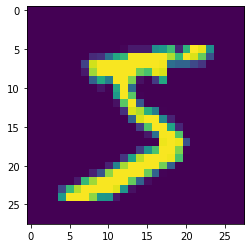

In [12]:
plt.imshow(single_image)

In [13]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [14]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [15]:
from tensorflow.keras.utils import to_categorical

In [16]:
y_train.shape

(60000,)

In [17]:
y_example = to_categorical(y_train)

In [18]:
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [19]:
y_cat_test = to_categorical(y_test,10)

In [20]:
y_cat_train = to_categorical(y_train,10)

In [21]:
single_image.max()

255

In [22]:
single_image.min()

0

In [23]:
x_train = x_train/255
x_trast = x_test/255

In [24]:
scaled_single = x_train[0]

In [25]:
scaled_single.max()

1.0

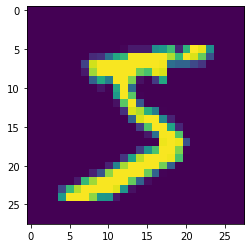

In [26]:
plt.imshow(scaled_single)

In [27]:
x_train.shape

(60000, 28, 28)

In [28]:
x_test.shape

(10000, 28, 28)

In [29]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [30]:
x_train.shape

(60000, 28, 28, 1)

In [31]:
x_test = x_test.reshape(10000,28,28,1)

In [32]:
x_test.shape

(10000, 28, 28, 1)

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [34]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))

# https://keras.io/metrics/
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) # we can add in additional metrics https://keras.io/metrics/

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [36]:
from tensorflow.keras.callbacks import EarlyStopping

In [37]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [38]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 92s 49ms/step - loss: 0.1366 - accuracy: 0.9589 - val_loss: 23.5379 - val_accuracy: 0.9589
Epoch 2/10
1875/1875 [==============================] - 88s 47ms/step - loss: 0.0463 - accuracy: 0.9853 - val_loss: 22.7449 - val_accuracy: 0.9688
Epoch 3/10
1875/1875 [==============================] - 90s 48ms/step - loss: 0.0294 - accuracy: 0.9906 - val_loss: 31.5988 - val_accuracy: 0.9570
Epoch 4/10
1875/1875 [==============================] - 88s 47ms/step - loss: 0.0191 - accuracy: 0.9937 - val_loss: 35.1991 - val_accuracy: 0.9598


In [39]:
model.metrics_names

['loss', 'accuracy']

In [40]:
losses  = pd.DataFrame(model.history.history)

In [41]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.136560,0.958950,23.537874,0.9589
1,0.046341,0.985333,22.744884,0.9688
2,0.029394,0.990567,31.598793,0.9570
3,0.019071,0.993700,35.199089,0.9598


<AxesSubplot:>

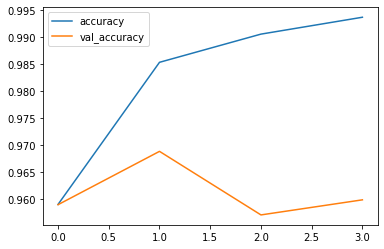

In [42]:
losses[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

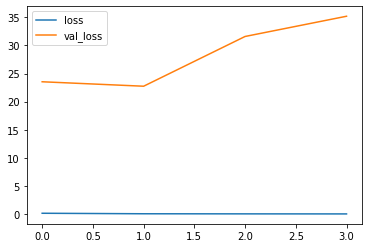

In [43]:
losses[['loss','val_loss']].plot()

In [44]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[35.19908905029297, 0.9598000049591064]


In [92]:
from tensorflow import keras
model2 = keras.models.load_model('output/mnist_model.h5')

In [93]:
model2.metrics_names

['loss', 'accuracy']

In [66]:
from sklearn.metrics import classification_report, confusion_matrix

In [94]:
predict_x=model2.predict(x_test) 

In [95]:
predict_x

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [96]:
classes_x=np.argmax(predict_x,axis=1)

In [97]:
classes_x

array([7, 2, 1, ..., 4, 5, 6])

In [98]:
print(classification_report(y_test,classes_x))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.98      0.99      1135
           2       0.99      0.95      0.97      1032
           3       0.99      0.97      0.98      1010
           4       0.96      0.99      0.98       982
           5       1.00      0.91      0.95       892
           6       0.98      0.98      0.98       958
           7       0.99      0.96      0.97      1028
           8       0.81      1.00      0.89       974
           9       1.00      0.91      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.97      0.96      0.97     10000
weighted avg       0.97      0.96      0.97     10000



In [88]:
confusion_matrix(y_test,classes_x)

array([[ 968,    0,    1,    0,    1,    0,    1,    1,    8,    0],
       [   0, 1117,    0,    0,    0,    0,    0,    0,   18,    0],
       [   2,    6,  981,    1,    2,    0,    3,    4,   33,    0],
       [   0,    1,    1,  981,    0,    2,    0,    2,   23,    0],
       [   0,    0,    1,    0,  975,    0,    1,    0,    4,    1],
       [   3,    0,    0,    5,    0,  813,   10,    1,   60,    0],
       [   4,    3,    0,    0,    2,    0,  936,    0,   13,    0],
       [   1,    4,    9,    0,    4,    0,    0,  984,   24,    2],
       [   2,    0,    0,    0,    0,    0,    0,    0,  972,    0],
       [   4,    2,    0,    0,   31,    0,    0,    4,   47,  921]])

In [90]:
my_number = x_test[0]

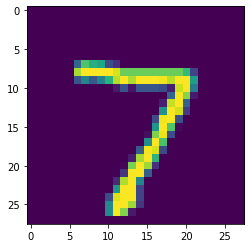

In [91]:
plt.imshow(my_number.reshape(28,28))

In [138]:
prediction1 = model2.predict(my_number.reshape(1,28,28,1))

In [139]:
prediction2 = np.argmax(prediction1,axis=1)

In [140]:
prediction2

array([7])